## Summary
The data is provided by our marketing deparment for customers who have sucessfully made a deposit.
Since our annual campaign is coming up so they have asked for assistance to map some rules for the team, so they can target specific customers
Need an experience data scientist who can deliver rules using Decision tree algorithm after analysis customers who make a deposit.
The data has poutcome which is feedback from previous campaign,

In [14]:
import pandas as pd

# Load data (CSV example)
df = pd.read_csv("Nbank_Tele.csv")

print(df.shape)
df.head()


(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# clean
df_clean = df.copy()
df_clean['deposit'] = df_clean['deposit'].map({'yes':1,'no':0})
df_clean.replace('unknown', pd.NA, inplace=True)
df_clean.dropna(inplace=True)
df_clean.drop(columns=['duration'], inplace=True)

X = pd.get_dummies(df_clean.drop('deposit', axis=1), drop_first=True)
y = df_clean['deposit']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

rules = export_text(dt, feature_names=list(X.columns))
rules
print(X_train.shape, X_test.shape)


(2140, 37) (535, 37)


Accuracy: 0.7084

Classification report:
              precision    recall  f1-score   support

          no       0.54      0.84      0.66       178
         yes       0.89      0.64      0.75       357

    accuracy                           0.71       535
   macro avg       0.71      0.74      0.70       535
weighted avg       0.77      0.71      0.72       535



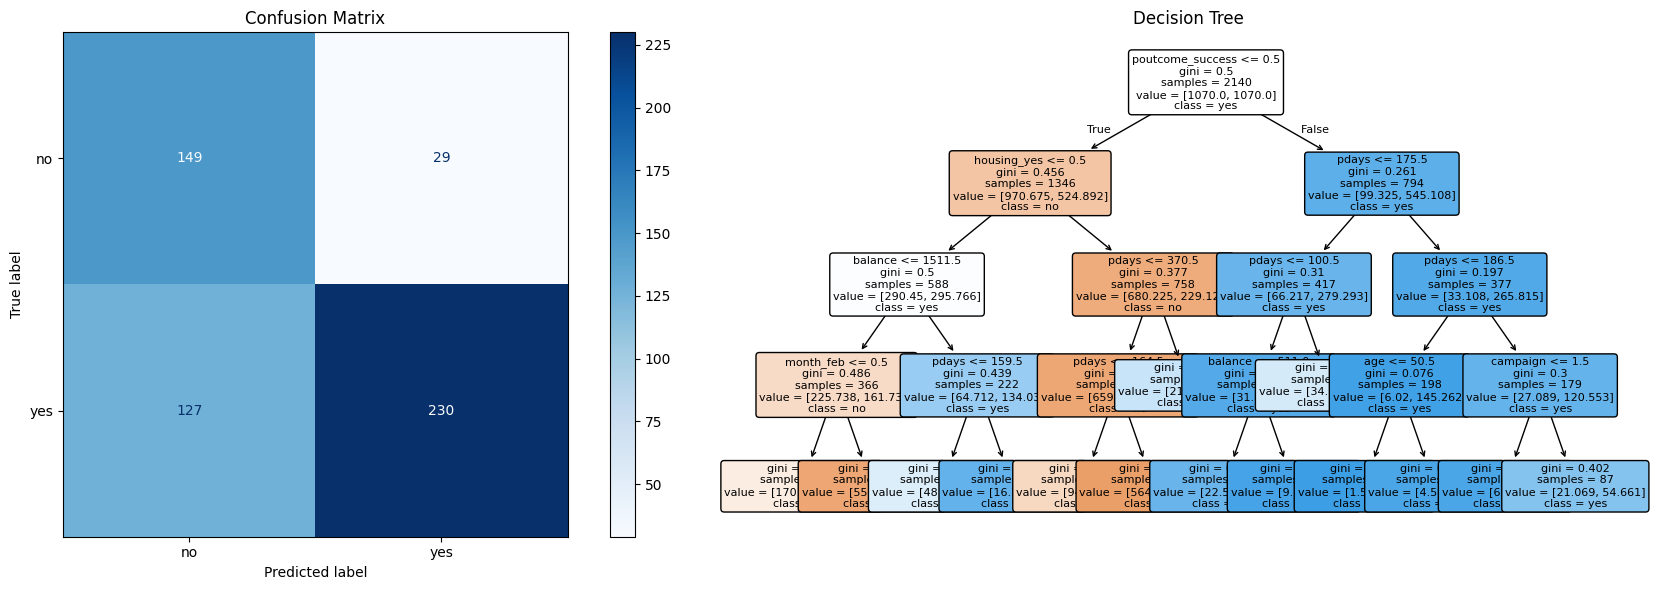

In [16]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# predict on test set
y_pred = dt.predict(X_test)

# evaluation metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")
print("Classification report:")
print(metrics.classification_report(y_test, y_pred, target_names=['no', 'yes']))

# confusion matrix (numeric + plotted)
cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['no', 'yes'])

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
disp.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Confusion Matrix')

# plot the decision tree
plot_tree(
    dt,
    feature_names=list(X.columns),
    class_names=['no', 'yes'],
    filled=True,
    rounded=True,
    fontsize=8,
    ax=ax[1]
)
ax[1].set_title('Decision Tree')
plt.tight_layout()
plt.show()

| Rule | Conditions                        | Action           |
| ---- | --------------------------------- | ---------------- |
| R1   | poutcome = success                | 🔥 High Priority |
| R2   | housing = no & campaign ≤ 1       | ✅ Target         |
| R3   | housing = yes & previous > 0      | ⚠️ Medium        |
| R4   | poutcome = failure & campaign > 2 | ❌ Exclude        |